# Exploratory Data Analysis

In [1]:
# load and view a .npy file
import numpy as np
from matplotlib import pyplot as plt
import sys
# load the .npy file
initial_inputs = np.load("initial_inputs.npy")
initial_outputs = np.load("initial_outputs.npy")
# summarize shape
print(initial_inputs.shape)
print(initial_outputs.shape)

# create a dataframe from inputs and outputs
import pandas as pd
data = pd.DataFrame(initial_inputs, columns=[f'input_{i}' for i in range(initial_inputs.shape[1])])
data['output'] = initial_outputs
print(data.head())

(40, 8)
(40,)
    input_0   input_1   input_2   input_3   input_4   input_5   input_6  \
0  0.604994  0.292215  0.908453  0.355506  0.201669  0.575338  0.310311   
1  0.178007  0.566223  0.994862  0.210325  0.320153  0.707909  0.635384   
2  0.009077  0.811626  0.520520  0.075687  0.265112  0.091652  0.592415   
3  0.506028  0.653730  0.363411  0.177981  0.093728  0.197425  0.755827   
4  0.359909  0.249076  0.495997  0.709215  0.114987  0.289207  0.557295   

    input_7    output  
0  0.734281  7.398721  
1  0.107132  7.005227  
2  0.367320  8.459482  
3  0.292472  8.284008  
4  0.593882  8.606117  


## Observations


# Gaussian Process with EI, PI and UCB

Next sample UCB: [0.1959799 0.5       0.5       0.5       0.5       0.5       0.5
 0.5      ]
Next sample EI: [0.  0.5 0.5 0.5 0.5 0.5 0.5 0.5]
Next sample PI: [0.  0.5 0.5 0.5 0.5 0.5 0.5 0.5]


/Users/brucediesel/.pyenv/versions/3.13.3/lib/python3.13/site-packages/sklearn/gaussian_process/kernels.py:450: ConvergenceWarning: The optimal value found for dimension 7 of parameter length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


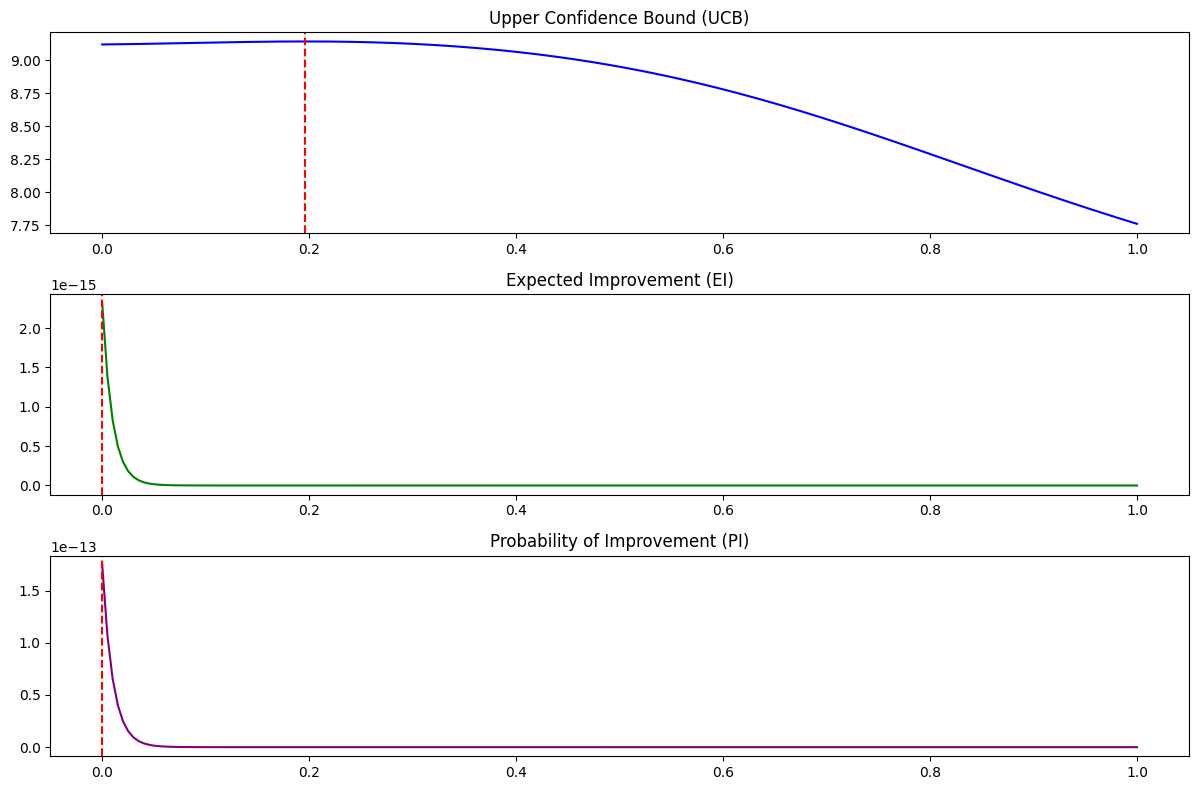

In [2]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern
from scipy.stats import norm

# Load the dataset
X = np.load("initial_inputs.npy")
y = np.load("initial_outputs.npy")

# Fit GP with Matern kernel
kernel = Matern(length_scale=np.ones(8), nu=2.5)
gp = GaussianProcessRegressor(kernel=kernel, alpha=1e-6, normalize_y=True)
gp.fit(X, y)

# Candidate points (vary first dimension)
n_candidates = 200
X_candidates = np.zeros((n_candidates, 8))
X_candidates[:, 0] = np.linspace(0, 1, n_candidates)
X_candidates[:, 1:] = 0.5

# Predictions
mu, sigma = gp.predict(X_candidates, return_std=True)
y_best = np.max(y)

# Acquisition functions
def UCB(mu, sigma, kappa=2.5): return mu + kappa * sigma
def EI(mu, sigma, y_best):
    improvement = mu - y_best
    Z = improvement / sigma
    return improvement * norm.cdf(Z) + sigma * norm.pdf(Z)
def PI(mu, sigma, y_best):
    Z = (mu - y_best) / sigma
    return norm.cdf(Z)

ucb_values, ei_values, pi_values = UCB(mu, sigma), EI(mu, sigma, y_best), PI(mu, sigma, y_best)

# Next samples
next_ucb, next_ei, next_pi = X_candidates[np.argmax(ucb_values)], X_candidates[np.argmax(ei_values)], X_candidates[np.argmax(pi_values)]
print("Next sample UCB:", next_ucb)
print("Next sample EI:", next_ei)
print("Next sample PI:", next_pi)

# Visualisation
plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
plt.plot(X_candidates[:, 0], ucb_values, 'b', label='UCB')
plt.axvline(next_ucb[0], color='r', linestyle='--')
plt.title('Upper Confidence Bound (UCB)')
plt.subplot(3, 1, 2)
plt.plot(X_candidates[:, 0], ei_values, 'g', label='EI')
plt.axvline(next_ei[0], color='r', linestyle='--')
plt.title('Expected Improvement (EI)')
plt.subplot(3, 1, 3)
plt.plot(X_candidates[:, 0], pi_values, 'purple', label='PI')
plt.axvline(next_pi[0], color='r', linestyle='--')
plt.title('Probability of Improvement (PI)')
plt.tight_layout()
plt.show()


## Observations
The choice for next sample is clearly nonsense.  With resort to random sample to start with, then improve my knowledge on how to get meaningful reults from these algorithms.

# Random Generation of next sample point

In [3]:
random_numbers = [np.random.random() for _ in range(8)]
print(random_numbers)

[0.3695108762344287, 0.3637354527597678, 0.19807354850799008, 0.8629644058690805, 0.35583667154815124, 0.5197758880675554, 0.2580107128712287, 0.6768046768685358]


# Week 1 Submission
0.369510-0.363735-0.198073-0.862964-0.355836-0.519775-0.258010-0.676804